<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
#load the dataset and split it directly
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
#Normalise the dataset 
train_images = train_images/255.0 
test_images = test_images/255.0

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

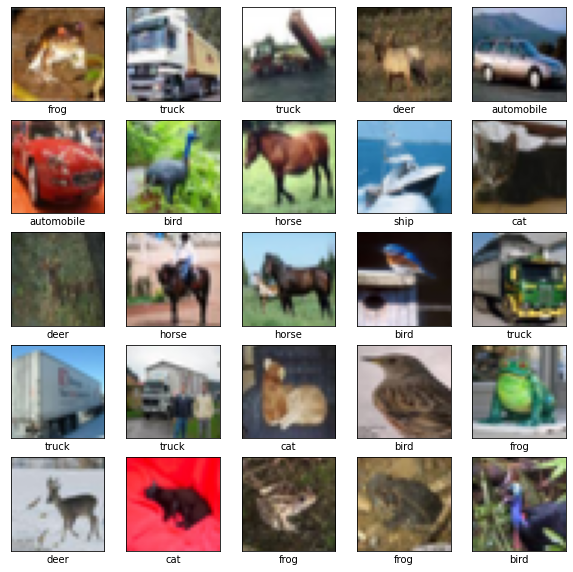

In [7]:
#Visualise the dataset to see whether the images are labeled correctly
figure = plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap='gray')
  plt.xlabel(class_name[train_labels[i][0]])

In [8]:
#After visulazing the data and check whether the images are labeled correctly we can go ahead and build our model,
#We'll make use of the sequential api in this case
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(train_images[0].shape)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(128,(3,3), activation='relu'))

In [9]:
#Add the fully connected layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))#Use a softmax classifier for the output because it is a multi-class classification 
#We have 10 classes in our dataset and 10 classes to classify  

In [10]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="SGD", metrics=['accuracy'])

In [11]:
#Let us now see the architecture of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

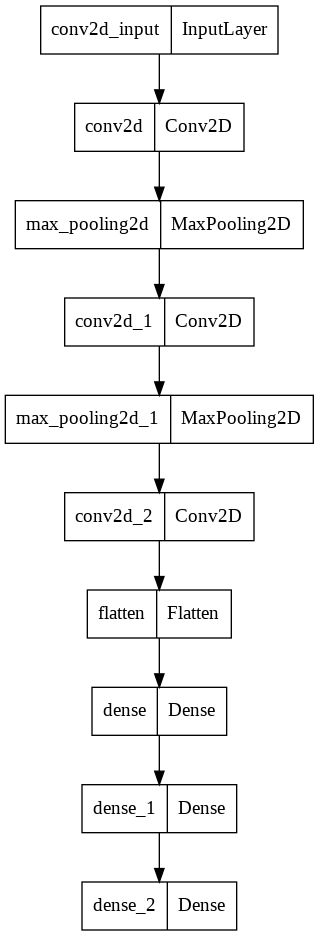

In [12]:
tf.keras.utils.plot_model(model)

In [13]:
#Define the checkpoint and callback function
checkpoint = "train.ckpt"
call_back = tf.keras.callbacks.ModelCheckpoint(checkpoint,verbose=1,save_best_only=True) 

In [14]:
#train the model
history = model.fit(train_images,train_labels,epochs=15,validation_data=[test_images,test_labels], verbose=1,callbacks=[call_back])

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - ETA: 0s - loss: 2.0107 - accuracy: 0.2568
Epoch 1: val_loss improved from inf to 1.82883, saving model to train.ckpt
INFO:tensorflow:Assets written to: train.ckpt/assets
1563/1563 [==============================] - 18s 5ms/step - loss: 2.0107 - accuracy: 0.2568 - val_loss: 1.8288 - val_accuracy: 0.3234
Epoch 2/15
1550/1563 [============================>.] - ETA: 0s - loss: 1.6378 - accuracy: 0.4073
Epoch 2: val_loss improved from 1.82883 to 1.55103, saving model to train.ckpt
INFO:tensorflow:Assets written to: train.ckpt/assets
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6370 - accuracy: 0.4074 - val_loss: 1.5510 - val_accuracy: 0.4301
Epoch 3/15
1549/1563 [============================>.] - ETA: 0s - loss: 1.4317 - accuracy: 0.4841
Epoch 3: val_loss improved from 1.55103 to 1.47290, saving model to train.ckpt
INFO:tensorflow:Assets written to: train.ckpt/assets
1563/1563 [==============================] - 7s 5ms/step -

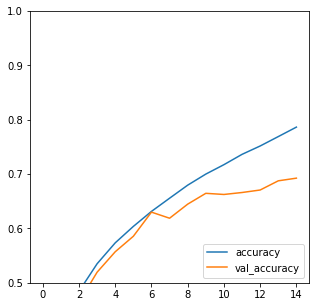

In [15]:
plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.ylim(0.5,1)
plt.legend(loc='lower right')
#Blue is the training accuracy  while the orange one is the validation accuracy

In [16]:
#Evaluate the model
loss , accuracy = model.evaluate(test_images, test_labels, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.9170 - accuracy: 0.6925


In [17]:
#Our accuracy in percentage
accuracy * 100

69.24999952316284

Text(0, 0.5, 'accuracy')

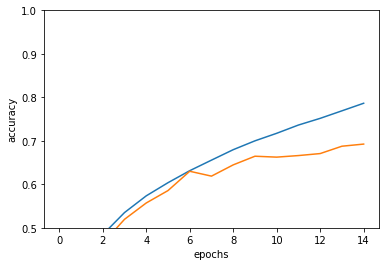

In [18]:
#We visualise the model's perfomance
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.ylim(0.50,1)
plt.xlabel('epochs')
plt.ylabel('accuracy')

Image classification: 
In an image classification task, the model has the task of assigning a class label to the input it receives.
Here we build the sequential model add and  load the data off disk.
We'll follow the typical machine learning pipeline, which includes:
1. Examining and understanding the data. ie.: Make sure the data is relevant to your problem.
2. Build an input pipeline i.e: various data pre-processing techniques.
3. Build the model.  
4. Train the model.
5. Test the model.
6. Improve the model and repeat the process. i.e:Analyze the errors and improve the model.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import  os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [20]:
#Download and explore the dataset
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 1s 0us/step


In [21]:
image_count =  len(list(data_dir.glob("*/*.jpg")))

In [22]:
image_count #Total of three thousand six hundred and seventy images downloaded

3670

In [23]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [24]:
roses = len(list(data_dir.glob('roses/*')))

In [25]:
roses = list(data_dir.glob('roses/*'))

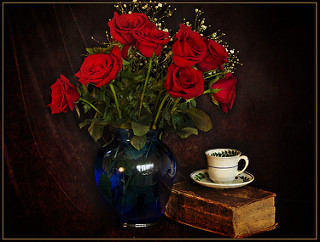

In [26]:
PIL.Image.open(roses[0])

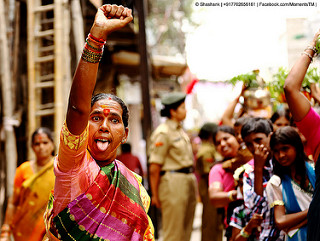

In [27]:
PIL.Image.open(roses[1])

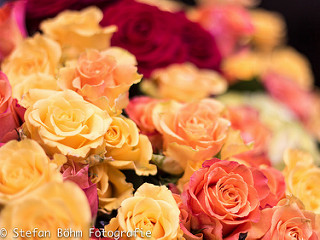

In [28]:
PIL.Image.open(roses[5])

In [29]:
tulips = list(data_dir.glob('tulips/*'))

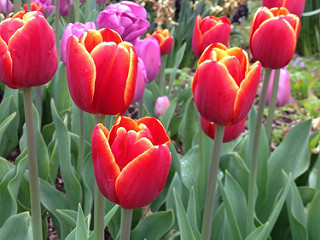

In [30]:
PIL.Image.open(tulips[2])

In [31]:
sunflower = list(data_dir.glob('sunflower/*'))

In [32]:
#PIL.Image.open(sunflower[0])

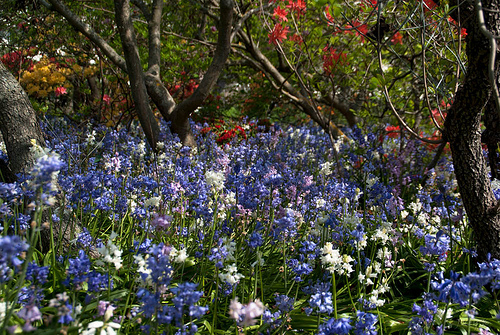

In [33]:
PIL.Image.open(str(tulips[0]))

In [34]:
#PIL.Image.open(str(sunflower[0]))

Loading data using keras utility 


In [35]:
#Create a dataset 
batch_size = 32
img_height = 180
img_width = 180

In [36]:
#Split the dataset
#We'll split the dataset into two i.e : train and test/validation set, 80% of the data will be used for training,
#20% will be used for testing and validation
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2, #20% of the data has been used for validation
    subset ="training",
    seed=123,
    image_size= (img_height, img_width), #dimensions of the image  based on height and width
    batch_size = batch_size
    )

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [37]:
class_names = train_dataset.class_names

In [38]:
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


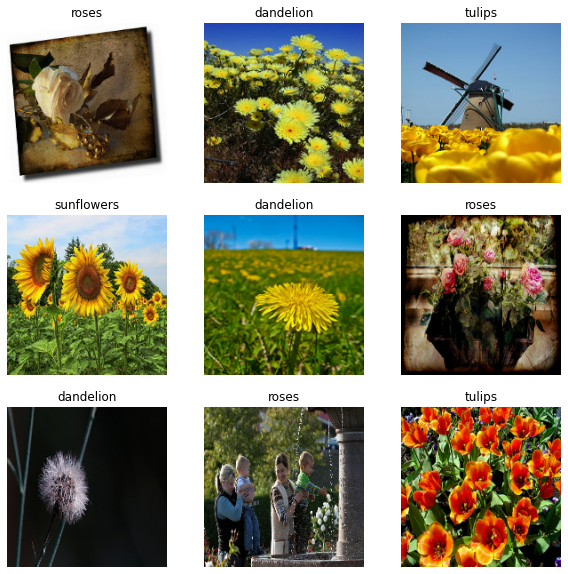

In [39]:
#Visualise the data 
#First nine images from the training dataset
plt.figure(figsize=(10,10))
for image,labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i + 1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis('off')
    plt.yticks([])
    plt.xticks([])

In [40]:
#We can manually iterate over the dataset and get the shape of the images 
for batch_images, labels_batch in train_dataset:
  print(batch_images.shape) #This is batch sample of 32 images of height 180 and width  180 and has 3 channels Red,Green and Blue
  print(labels.shape) #The are the corresponding labels for the 32 images
  break
#Caching data to disk

(32, 180, 180, 3)
(32,)


In [41]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [42]:
#The RGB values are 3 channels of pixel values in 2D arrays  that range from 0 to 255 
#We should make our input small i.e change the values to be floating point numbers in between zero and one
normalization_layer = tf.keras.layers.Rescaling(1./255)

Image classification with tensorflow

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [44]:
#We'll use a dataset that contains 3,700 photos of flowers that has 5 subdirectories where by each directory  represent the five different classes
#One directory per class

In [45]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,untar=True)
data_dir = pathlib.Path(data_dir)

In [46]:
#Check the length of the images downloaded  
image_count = len(list(data_dir.glob('*/*.jpg')))

In [47]:
image_count

3670

In [48]:
roses = list(data_dir.glob('roses/*'))

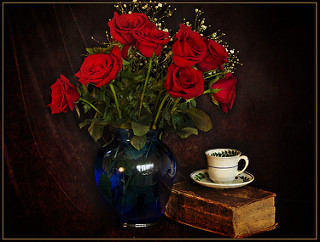

In [49]:
PIL.Image.open(roses[0])

In [50]:
tulips = list(data_dir.glob('tulips/*'))

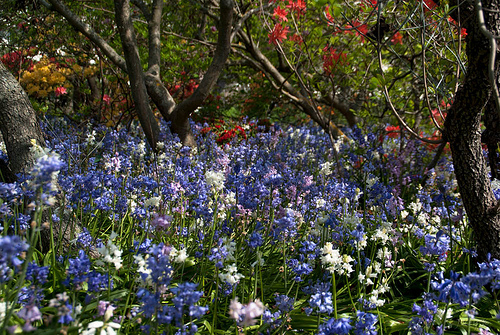

In [51]:
PIL.Image.open(tulips[0])

In [52]:
#Create a dataset
#Start by defining the image dimensions 
batch_size = 32
img_height = 180
img_width = 180  

In [53]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2, 
    subset ="training",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size 
) #We  have split the data into two 20% testing and 80% training

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [54]:
validation_data = tf.keras.utils.image_dataset_from_directory(
data_dir,
validation_split = 0.2,
seed = 123,
subset =  "validation",
batch_size = batch_size,
image_size = (img_height,img_width)
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [55]:
#The class names can be found like this
class_names = train_dataset.class_names

In [56]:
#Print out the class names
class_names
#You can see that we have a total of five classes 

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

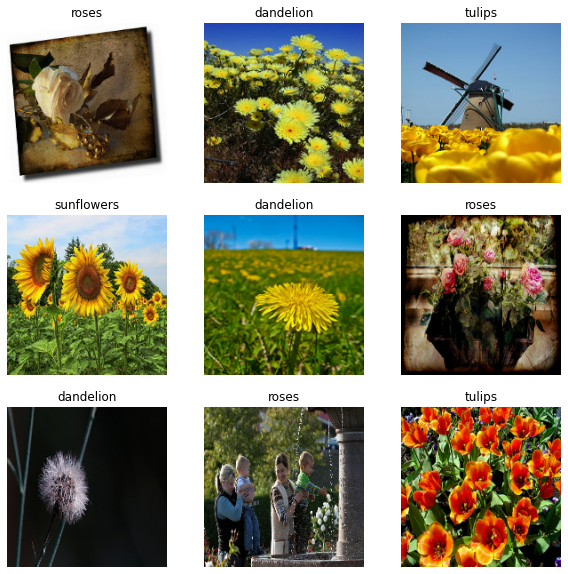

In [57]:
#We can now visualize the data
figure =plt.figure(figsize = (10,10))
for images,labels in train_dataset.take(1):
  for i in range(9):
    figure.add_subplot(3,3,i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

All the images are correctly labeled

In [58]:
#We cam manually iterate over the dataset and get the images
for images, labels in train_dataset:
  print(images.shape) #Here we can see the shape of the images which are 32 images of 180 height and 180 width, together with 3 channels
  print(labels.shape) #These are the corresponding labels to the select images(32 images called the batch sample) 
  break

(32, 180, 180, 3)
(32,)


In [59]:
#Cache the data to memory before training 
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [60]:
#Our images are colored which means  that they are pilxel values between 0  to 255  found in 3 channels RGB 
#We have to turn them into gray scale values in between zero and one

In [61]:
normalizing_layer = tf.keras.layers.Rescaling(1./255) #We turn the pixel values in the images to be floatin point numbers in between zero and one

In [62]:
normalized_dataset = train_dataset.map(lambda x,y:(normalizing_layer(x),y))

In [63]:
#We make the normalized dataset iterable
image_batch, labels_batch = next(iter(normalized_dataset))

In [64]:
first_image = image_batch[0]

In [65]:
np.min(first_image) #Prints out the minimum value in the image/2D matrix(tables of rows and columns)

0.0

In [66]:
np.max(first_image)#Prints out the maximum values in the image/2D matrix(table of rows and columns)

0.97046

In [67]:
#the total size/length of our classes
num_classes = len(class_names)
#Define the size of the image 
num_channels = 3
image_size = (img_height, img_width,num_channels)

In [68]:
#We build the computational graph to train our model on 
model = tf.keras.models.Sequential([
tf.keras.layers.Rescaling(1./255, input_shape=(image_size)),
tf.keras.layers.Conv2D(16,(3,3),activation='relu'), #This is th first convolution layer that has around 16 features to be learned from
tf.keras.layers.MaxPooling2D((2,2)),#Add a max pooling layer to down sample the image and reduce the spatial invariance
tf.keras.layers.Conv2D(32,(3,3)),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Conv2D(64,(3,3)),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Conv2D(128,(3,3)),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(300,kernel_initializer="he_normal"),
tf.keras.layers.Activation('elu'), 
tf.keras.layers.Dense(100,kernel_initializer='he_normal'),
tf.keras.layers.Activation('elu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(num_classes),
])

In [69]:
#Compile the model: define the hyperparameters
#model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),#optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
 #          optimizer='Adam',  metrics = ['accuracy'])

In [70]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,nesterov=True),metrics=['accuracy']) 

In [71]:
#Define the callback functions and the checkpoints 
check_point = "train_model_one/cp-{epoch:04d}.ckpt"
call_back = tf.keras.callbacks.ModelCheckpoint(check_point,verbose=1, save_freq=5 * batch_size, save_weights_only=True)
model.save_weights(check_point.format(epoch=0)) 
#We have defined a callback that saves the model after every five seconds

In [72]:
#Train the model 
model.fit(train_dataset, epochs=20,callbacks=[call_back],verbose =1,validation_data=[validation_data] )

Epoch 1/20
92/92 [==============================] - 5s 35ms/step - loss: 1.2905 - accuracy: 0.4963 - val_loss: 1.4356 - val_accuracy: 0.3447
Epoch 2/20
67/92 [====================>.........] - ETA: 0s - loss: 0.8185 - accuracy: 0.6985
Epoch 2: saving model to train_model_one/cp-0002.ckpt
92/92 [==============================] - 3s 31ms/step - loss: 0.8171 - accuracy: 0.6965 - val_loss: 1.3633 - val_accuracy: 0.4305
Epoch 3/20
92/92 [==============================] - 3s 31ms/step - loss: 0.6264 - accuracy: 0.7779 - val_loss: 1.3050 - val_accuracy: 0.4305
Epoch 4/20
43/92 [=============>................] - ETA: 0s - loss: 0.4630 - accuracy: 0.8554
Epoch 4: saving model to train_model_one/cp-0004.ckpt
92/92 [==============================] - 3s 31ms/step - loss: 0.4610 - accuracy: 0.8522 - val_loss: 1.1276 - val_accuracy: 0.5395
Epoch 5/20
92/92 [==============================] - 3s 31ms/step - loss: 0.3148 - accuracy: 0.9223 - val_loss: 1.0325 - val_accuracy: 0.5981
Epoch 6/20
18/92 [===

Text(0.5, 1.0, 'Model accuracy per epoch')

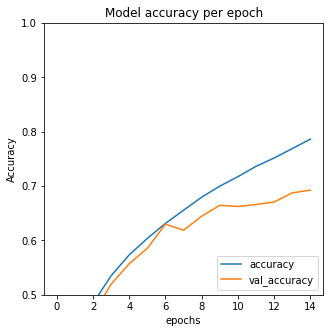

In [73]:
plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(loc= 'lower right')
plt.ylim(0.5,1)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Model accuracy per epoch')

Image classification

In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
#matplotlib, numpy ,os and PIL 
import matplotlib.pyplot as plt
import numpy
import os
import PIL

In [87]:
import pathlib
from pathlib import Path
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar = True)
data_dir = Path(data_dir)

In [88]:
image_count = len(list(data_dir.glob('*/*.jpg')))

In [90]:
image_count #We can see that there is a total of three thousand six hundred and seventy images downloaded

3670

In [91]:
roses = list(data_dir.glob('roses/*'))

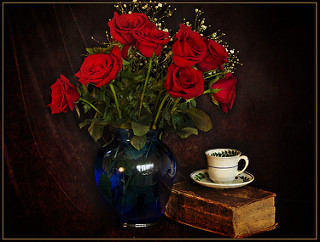

In [93]:
PIL.Image.open(roses[0]) #Visual image of the first rose flower in the list

Visualise tulips before adding loading data using the keras utility

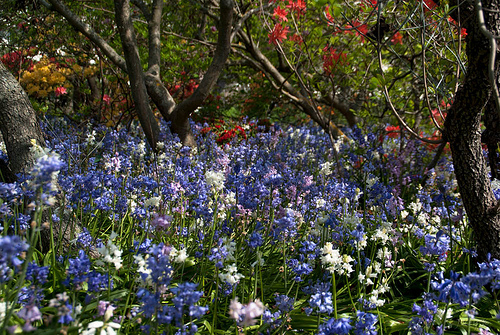

In [96]:
tulips =  list(data_dir.glob('tulips/*'))
PIL.Image.open(tulips[0]) #A visual image of the first tulips picture in the list 

In [97]:
#Create a dataset 
batch_size = 32
image_height = 180
image_width = 180 

We'll split the dataset according to the 80/20, rule where by we use 80% of the images for training and 20% of the images for testing

In [100]:
#Split the data 
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed =123, 
    batch_size = batch_size,
    image_size =(image_height,image_width)
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [102]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2, 
    subset = "validation",
    seed = 123,
    batch_size = batch_size,
    image_size =(image_height, image_width)
    )

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [103]:
class_names=train_dataset.class_names

In [106]:
class_names #We have a total of five classes of flowers 

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

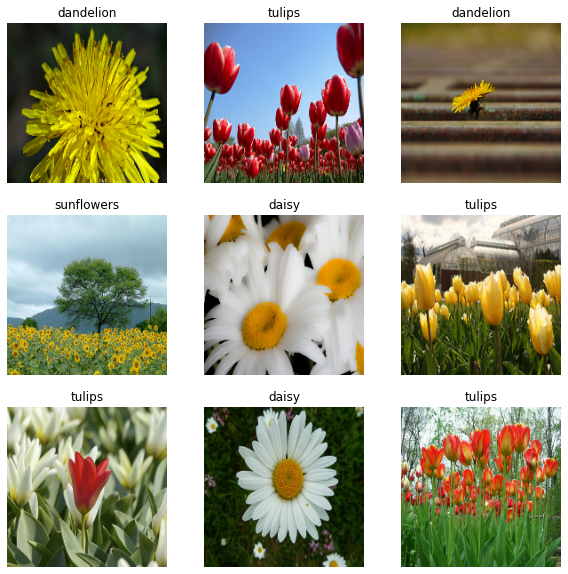

In [120]:
#Visualise the dataset before passing it to our computational graph
figure = plt.figure(figsize=(10,10))
rows,cols = 3,3
for image, label in train_dataset.take(1):
  for i in range(9):
    figure.add_subplot(rows,cols, i + 1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.axis('off')
    plt.title(class_names[label[i]])

In [122]:
#We could manually iterate over the dataset and retrieve batches of images
for image_batch,labels_batch in train_dataset:
  print(image_batch.shape) #Prints the size of the batch samples,  the image height, the image width and finally the number of channels in the image(RGB) if its 3 it means the image is colored respectively
  print(labels_batch.shape) #These are the labels corresponding to the images in the batch sample
  break

(32, 180, 180, 3)
(32,)


We'll use the dataset.cache to load the data into memory after the first epoch.
Dataset.prefetch overlaps the data preprocessing step during training

In [128]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE)

We now Normalize the data before building the computational graph. We normalize the data to prevent biasness/ unfavouritsm in the data that might affect the accuracy of the model and also to make the model computationaly efficient 

In [129]:
normalize_data = tf.keras.layers.Rescaling(1./255)

Map the dataset and normalize the data we'll use during training 

In [132]:
normalized_data = train_dataset.map(lambda x,y: (normalize_data(x),y)) #Normalized training data

We wrap the normalized dataset around an iterable and check whether the data has been normalized(Turning the image into grayscale: pixel values become floating point numbers in between zero and one)

In [133]:
norm = next(iter(normalized_data))

In [134]:
first_image = norm[0]

In [ ]:
first_image

In [137]:
#Turn the image into a numpy array
first_num = np.array(first_image)

In [141]:
np.max(first_num) #The maximum value in our array is one
np.min(first_num) #The least value is zero,

0.0

In [142]:
first_image.shape

TensorShape([32, 180, 180, 3])

In [163]:
num_classes = len(class_names)

In [164]:
#Build the model 
model = tf.keras.models.Sequential([
tf.keras.layers.Rescaling(1.255,input_shape=(180,180,3), name='normalizationlayer'),
tf.keras.layers.Conv2D(16,(3,3), padding='same',activation = 'relu',name ='firstconvlayer'), #First convolution layer with 16  features to learn from,  a filter of 3 by 3 and an activation function = relu because it is computationaly efficient 
tf.keras.layers.MaxPool2D((2,2), name='firstmaxpool'),#This is a max pooling layer with a filter of 2 by 2 which pulls out the maximum value in the image patch, the takes a stride until it covers the whole image
tf.keras.layers.Conv2D(32,(3,3),padding='same',activation= 'relu', name='secondconvolutionlayer'),
tf.keras.layers.MaxPool2D((2,2), name = 'secondmaxpool'),
tf.keras.layers.Conv2D(64,(3,3), padding='same', activation = 'relu', name ='thirdconvolutionlayer'),
tf.keras.layers.MaxPool2D((2,2), name = 'thirdmaxpoolinglayer'),
tf.keras.layers.Conv2D(128,(3,3), padding='same',activation='relu', name = 'fourthconvolutionlayer'),
tf.keras.layers.MaxPooling2D((2,2), name='fourthmaxpoolinglayer'),#last max pool
tf.keras.layers.Flatten(), #We flatten the inputs from our feature extractor  and turn them for a matrix (2D array:Tables of rows and colums) into a vector(1D array:it has one row and one column like a list)
#A tensor is  list data structure that is similar to an array and a matrix and it has different ranks(size/dimensions)
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(300,kernel_initializer="he_normal"),
tf.keras.layers.Activation('elu'),
tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
tf.keras.layers.Activation('elu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(num_classes,activation='softmax')
])

Compile the model

In [165]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='Adam', metrics=['Accuracy'])

In [174]:
#Define the callback function to save the model after every five seconds during training 
check_point = "train_one/cp-{epoch:04d}.ckpt"
call_back =  tf.keras.callbacks.ModelCheckpoint(check_point,verbose=1, save_weights_only=True,save_freq=5 * batch_size)
model.save_weights(check_point.format(epoch=0))

In [175]:
History = model.fit(train_dataset, epochs=10, verbose=1, validation_data=[validation_dataset], callbacks=[call_back])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 5s 42ms/step - loss: 1.2944 - Accuracy: 0.5027 - val_loss: 2.4446 - val_Accuracy: 0.3665
Epoch 2/10
67/92 [====================>.........] - ETA: 0s - loss: 0.9544 - Accuracy: 0.6273
Epoch 2: saving model to train_one/cp-0002.ckpt
92/92 [==============================] - 2s 27ms/step - loss: 0.9571 - Accuracy: 0.6253 - val_loss: 1.4465 - val_Accuracy: 0.5218
Epoch 3/10
92/92 [==============================] - 2s 25ms/step - loss: 0.7849 - Accuracy: 0.7095 - val_loss: 1.4437 - val_Accuracy: 0.4646
Epoch 4/10
43/92 [=============>................] - ETA: 1s - loss: 0.6028 - Accuracy: 0.7791
Epoch 4: saving model to train_one/cp-0004.ckpt
92/92 [==============================] - 3s 27ms/step - loss: 0.6159 - Accuracy: 0.7704 - val_loss: 1.2064 - val_Accuracy: 0.5572
Epoch 5/10
92/92 [==============================] - 2s 25ms/step - loss: 0.4864 - Accuracy: 0.8236 - val_loss: 2.6419 - val_Accuracy: 0.4223
Epoch 6/10
19/92 [=====>....................

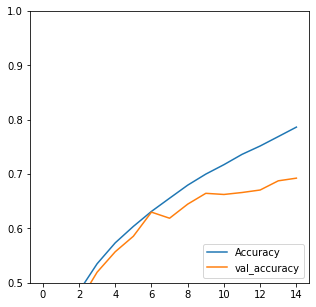

In [182]:
#Visualize the performance of the model
plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'], label ='Accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.ylim(0.5,1)
plt.legend(loc="lower right")

Overfitting